In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df = pd.read_csv('StudentsPerformance.csv')

### This dataset consists of the marks secured by High school students in various subjects. Students in the United States. To understand the influence of the parents background, test preparation, etc on students performance.

In [193]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [185]:
# Initial Data Exploration
print(f"Summary Statistics for Numerical Data")
print(df.describe().T)
print()
print(f"Summary Statistics for Categorical Data")
print(df.describe(include='object').T)
print()
print(df.info())

Summary Statistics for Numerical Data
                count    mean        std   min    25%   50%   75%    max
math score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0
reading score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0
writing score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0

Summary Statistics for Categorical Data
                            count unique           top freq
gender                       1000      2        female  518
race/ethnicity               1000      5       group C  319
parental level of education  1000      6  some college  226
lunch                        1000      2      standard  645
test preparation course      1000      2          none  642

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null  

### Findings

1. **Dataset Overview**:
   - The dataset contains 1000 rows and 8 columns.
   - Features include both numerical (e.g., math score, reading score, and writing score) and categorical (e.g., gender, race/ethnicity, parental level of education, lunch, and test preparation course) variables.

2. **Key Insights**:
   - **Gender**: More Female than Male students.
   - **math score**: 50% of a thousand students scored up to 66 in maths.
   - **Test Preparation Course**: A significant number of students did not take/complete a 'Test Preparation Course' (642).

In [55]:
print(df['gender'].value_counts())
print()
print(df['race/ethnicity'].value_counts())
print()
print(df['parental level of education'].value_counts())
print()
print(df['lunch'].value_counts())
print()
print(df['test preparation course'].value_counts())

gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course
none         642
completed    358
Name: count, dtype: int64


In [145]:
# Univariate Analysis

In [150]:
numerical_vars = ['math score', 'reading score', 'writing score']
categorical_vars = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [143]:
sns.set(style='whitegrid')

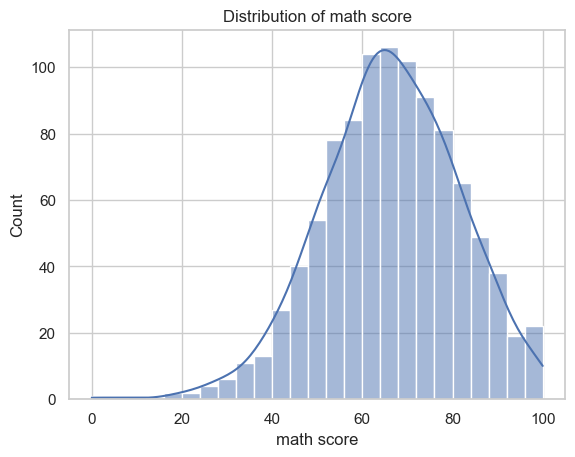

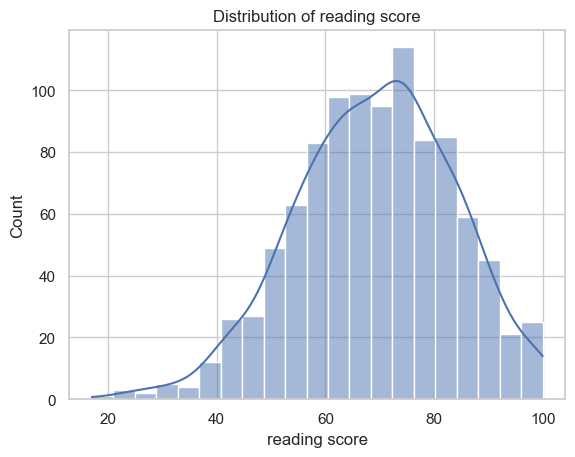

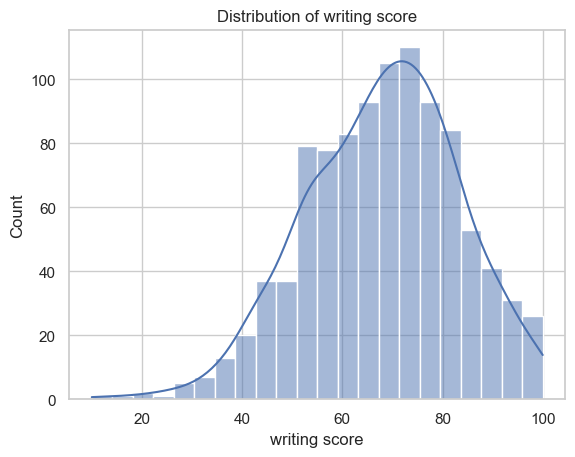

In [144]:
# Distribution of numerical variables
for var in numerical_vars:
  sns.histplot(df[var], kde=True)
  plt.title(f'Distribution of {var}')
  plt.show()

1. **Math score**:
   - Approximately normal distribution, with peak score between 60 and 70.
   - Over 20 students scored 100 in math.
  
2. **Reading score**:
   - Left-skewed distribution with a concentration of scores towards the upper end.
   - A peak score between 70 and 80.
     
3. **Writing score**:
   - Peak score between 70 and 80.
   - A few scored below 20.

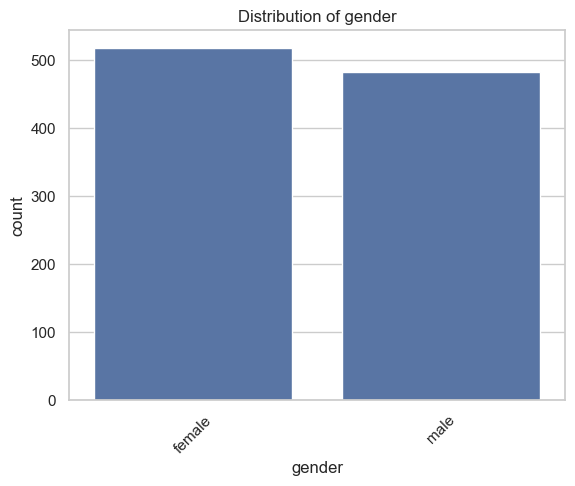

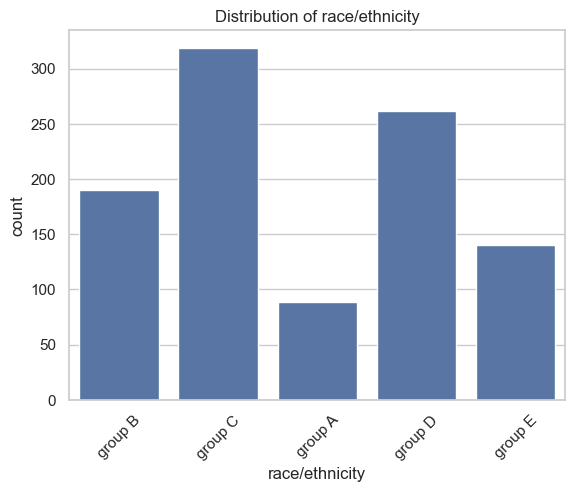

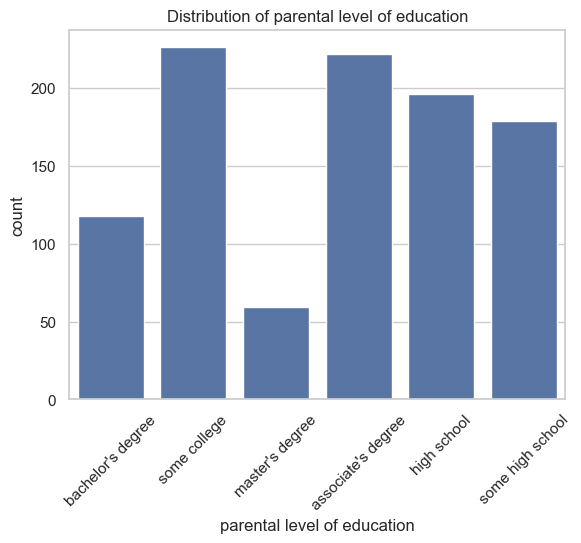

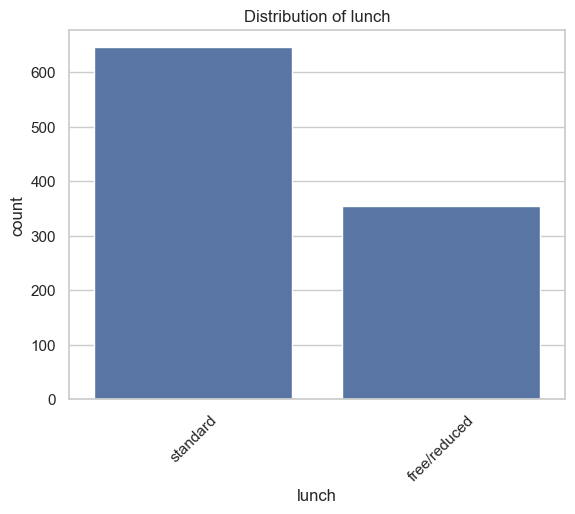

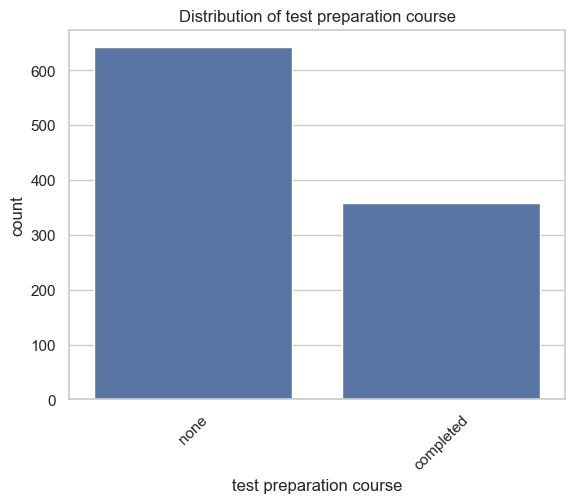

In [178]:
# Distribution of categorical variables
for var in categorical_vars:
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

#### Gender
    - The majority of students are female.
    - The number of male students is relative to the female.

#### Race/ethnicity
    - Group C - ethnic group with the highest number of students.
    - The ethnic group with the least number of students is Group A.

#### Parental level of education
    - Fewer number of students have parents who are Master degree holders.
    - Most students have parents who completed some college.

#### Lunch
    - The students that standard lunch are twice as much those that eat free/reduced lunch.

#### Test preparation course
    - Over 60% of students did not take/complete a test preparation course.

In [81]:
# Bivariate Analysis

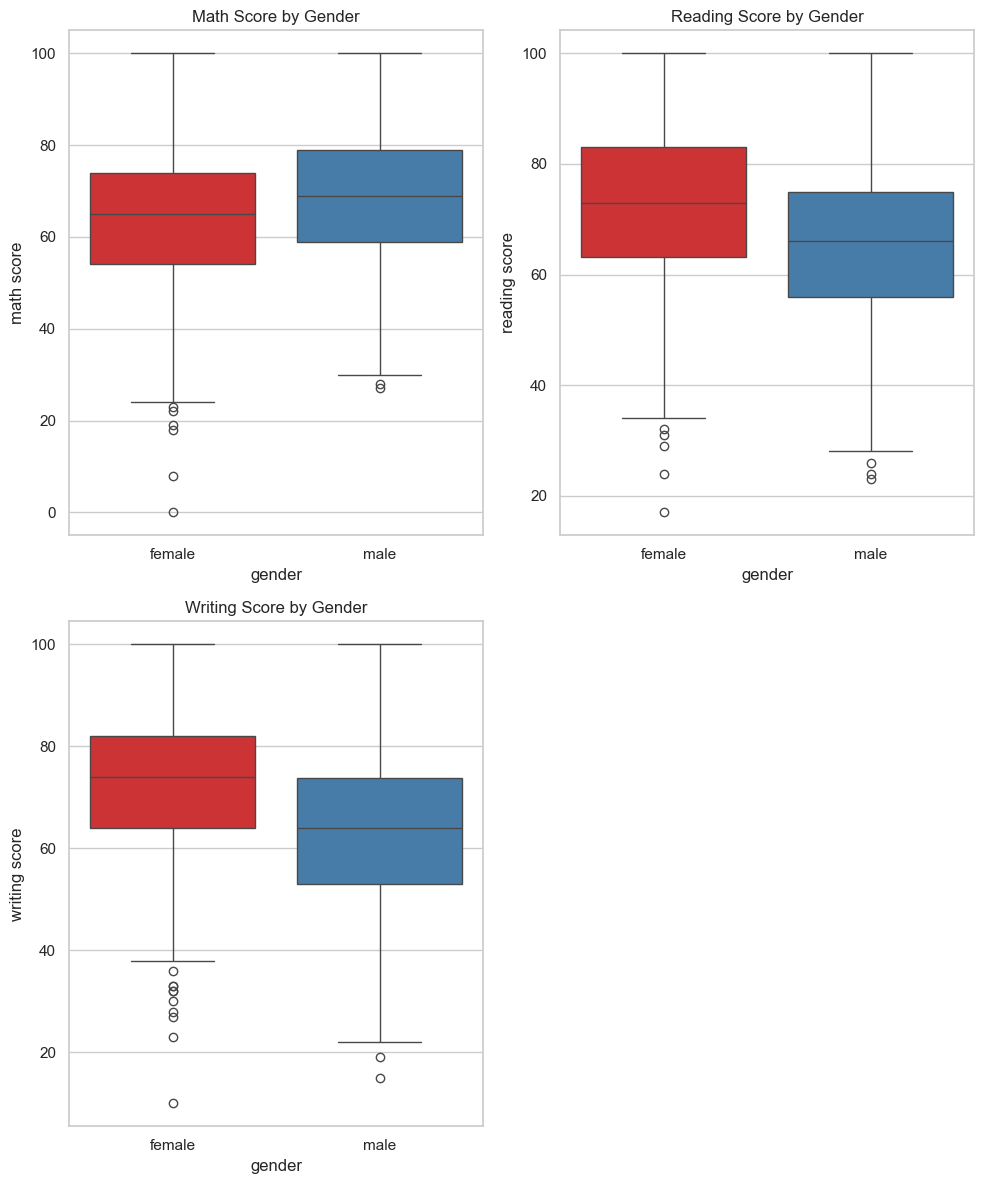

In [190]:
# scores by gender
plt.figure(figsize=(10, 12))

# First plot
plt.subplot(2, 2, 1)
sns.boxplot(x='gender', y='math score', data=df, hue='gender', palette='Set1')
plt.title(f'Math Score by Gender')

# Second plot
plt.subplot(2, 2, 2)
sns.boxplot(x='gender', y='reading score', data=df, hue='gender', palette='Set1')
plt.title(f'Reading Score by Gender')

# Third plot
plt.subplot(2, 2, 3)
sns.boxplot(x='gender', y='writing score', data=df, hue='gender', palette='Set1')
plt.title(f'Writing Score by Gender')

plt.tight_layout()
plt.show()

The male students performed better in math on average compared to female students, with at least a female student scoring as low as 0. While the female students excelled better than male students in both reading and writing.

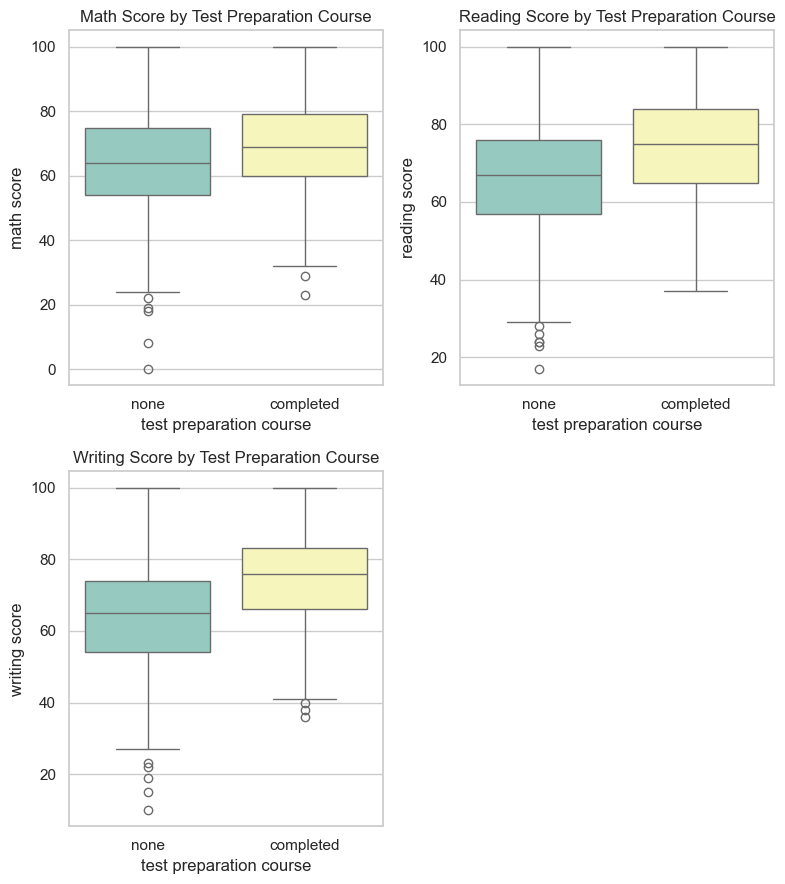

In [153]:
# scores by test preparation course
plt.figure(figsize=(8, 9))

# First plot
plt.subplot(2, 2, 1)
sns.boxplot(x='test preparation course', y='math score', data=df, hue='test preparation course', palette='Set3')
plt.title(f'Math Score by Test Preparation Course')

# Second plot
plt.subplot(2, 2, 2)
sns.boxplot(x='test preparation course', y='reading score', data=df, hue='test preparation course', palette='Set3')
plt.title(f'Reading Score by Test Preparation Course')

# Third plot
plt.subplot(2, 2, 3)
sns.boxplot(x='test preparation course', y='writing score', data=df, hue='test preparation course', palette='Set3')
plt.title(f'Writing Score by Test Preparation Course')

plt.tight_layout()
plt.show()

The different score plots proofs that the test preparation course had a consistent impact on the performance of the students, with each showing that those who took/completed the test preparation course performed better on all tests.

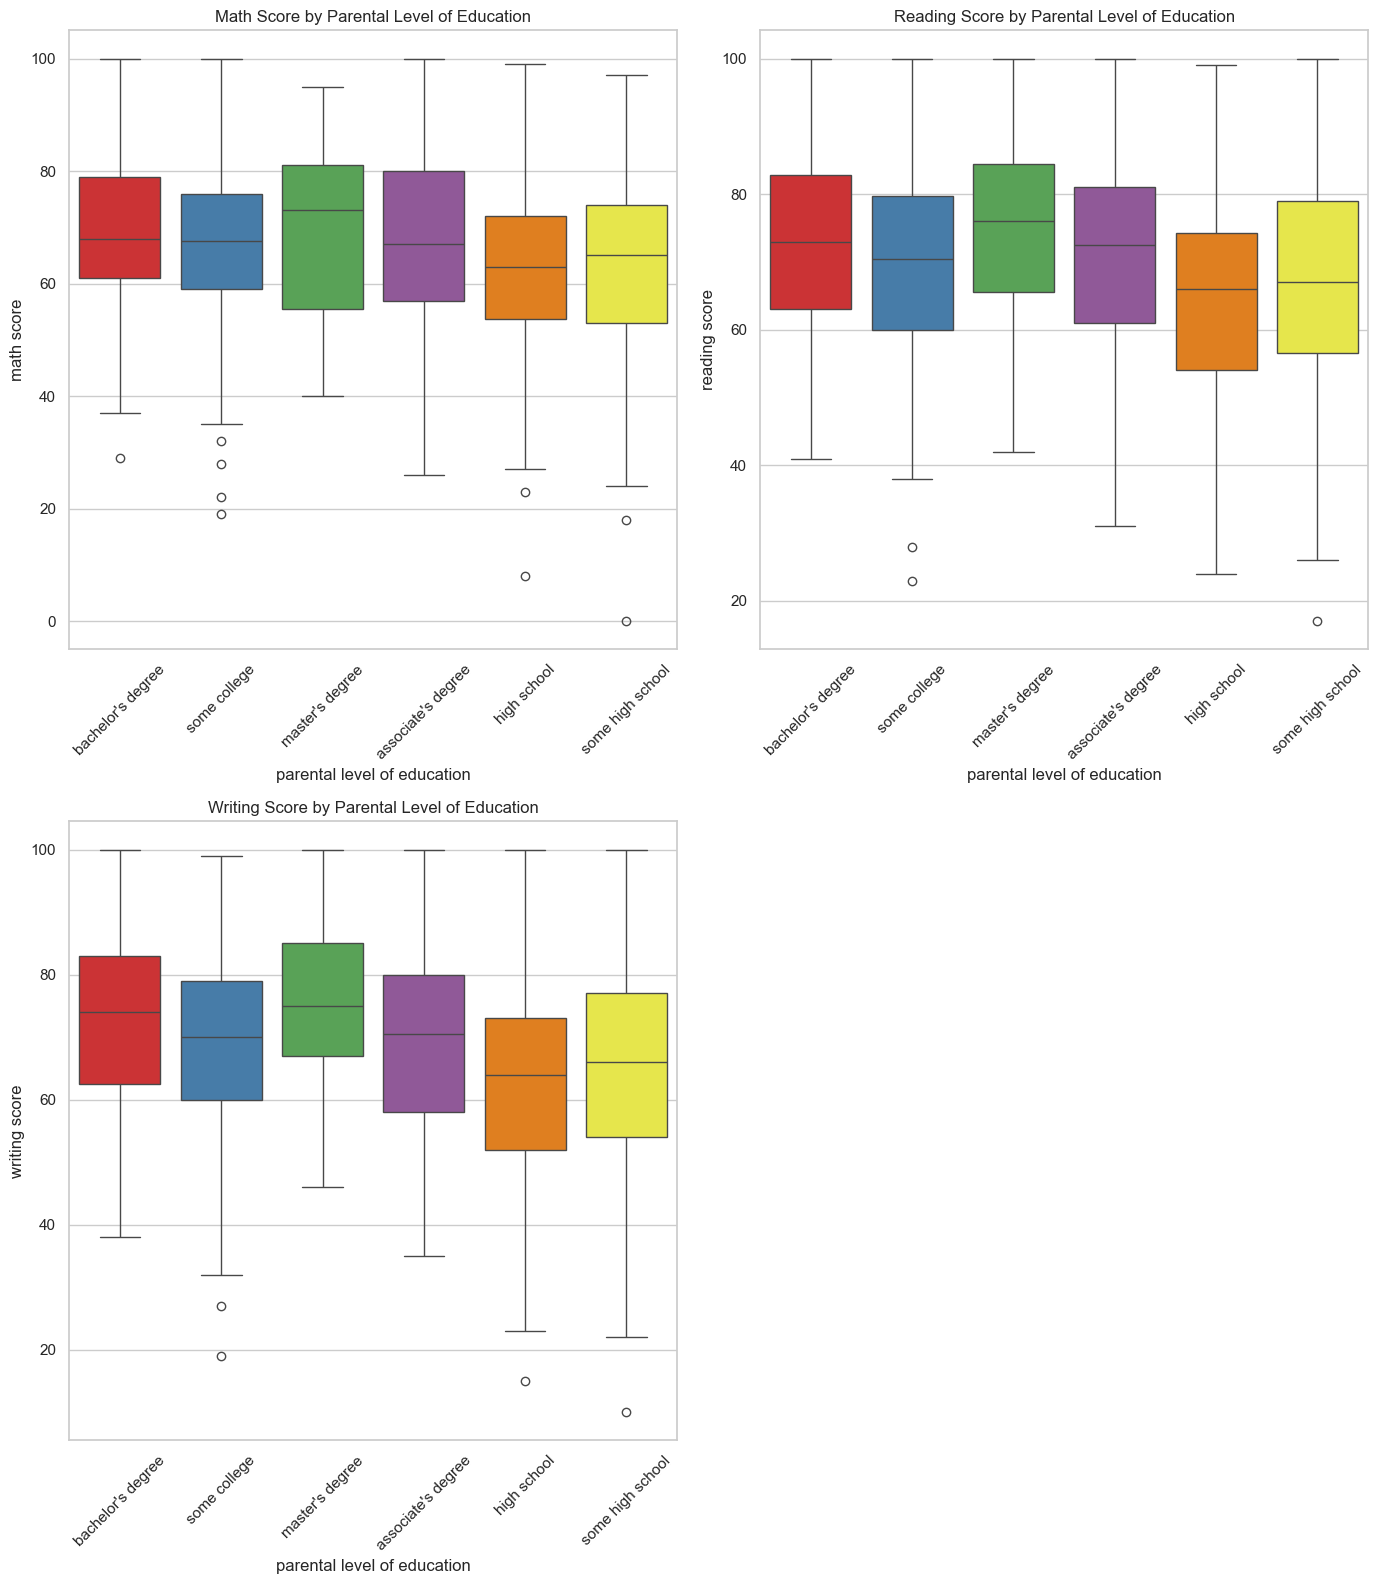

In [154]:
# scores by parental level of education
plt.figure(figsize=(14, 16))

# First plot
plt.subplot(2, 2, 1)
sns.boxplot(x='parental level of education', y='math score', data=df, hue='parental level of education', palette='Set1')
plt.xticks(rotation=45)
plt.title(f'Math Score by Parental Level of Education')

# Second plot
plt.subplot(2, 2, 2)
sns.boxplot(x='parental level of education', y='reading score', hue='parental level of education', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title(f'Reading Score by Parental Level of Education')

# Third plot
plt.subplot(2, 2, 3)
sns.boxplot(x='parental level of education', y='writing score', hue='parental level of education', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title(f'Writing Score by Parental Level of Education')

plt.tight_layout()
plt.show()

The above plots shows how parental level of education can influence student's academic performance. 
Students whose parents have a master's degree performed better on all three tests, followed by those whose parents have a bachelor's degree with the least performing students from parents with just a high school degree.

In [86]:
# Multivariate Analysis

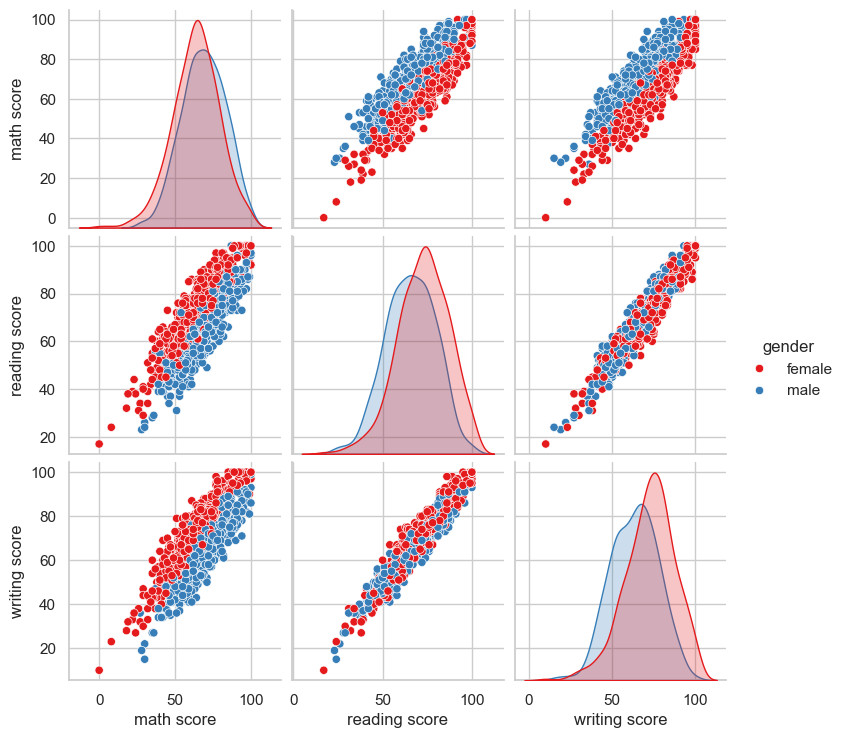

In [188]:
# Pairplot of scores
sns.pairplot(df, hue='gender', palette='Set1', diag_kind='kde')
plt.show()


### Findings from Multivariate Pairplot

1. **Math score vs. Other Variables**:
    - **Math score vs. Writing score**: Students who did better at writing also did better at math, however, the female students scored higher overall than the male.
    - **Math score vs. Reading score**: Students who performed better at reading also did well at math with female dominating overall.

2. **Reading score vs. Other Variables**:
    - **Reading score vs. Writing score**: There is an increasing correlation between the performance of students in both writing and reading, but there's a struggle or cluster of overall performance between male and female students.
    - **Reading score vs. Math score**: Both male and female increasingly performed better at both reading and math, but with the male dominating overall.

3. **Writting score vs. Other Variables**:
    - **Writing score vs. Reading score**: There is an increasing correlation between the performance of students in both writing and reading, but there's a struggle or cluster of overall performance between male and female students.
    - **Math score vs. Reading score**: An increasing correlation between the two, but with the male students dominating the female overall.

4. Each individual scores (the diagonal plots) shows a left-skew, implying most of the students did well in each of the tests.

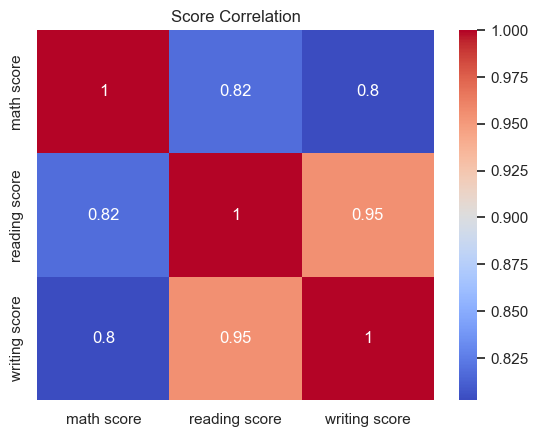

In [106]:
# Correlation heatmap
sns.heatmap(df[numerical_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Score Correlation')
plt.show()

The correlation between each relationships are significantly positive, suggesting that students who performed well on one test also performed well across another test, and vise versa.

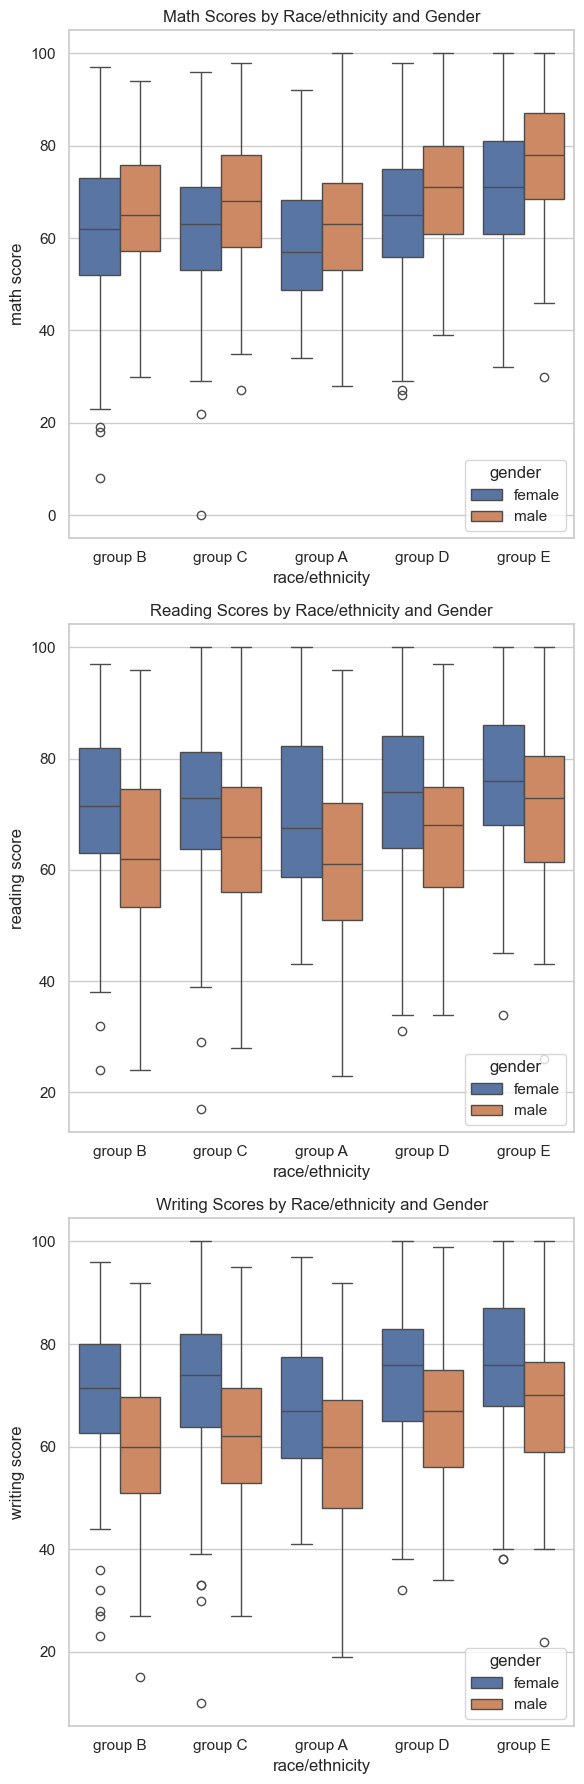

In [165]:
# Scores by race/ethnicity and gender
plt.figure(figsize=(6, 18))

# First plot
plt.subplot(3, 1, 1)
sns.boxplot(x='race/ethnicity', y='math score', hue='gender', data=df)
plt.title('Math Scores by Race/ethnicity and Gender')

# Second plot
plt.subplot(3, 1, 2)
sns.boxplot(x='race/ethnicity', y='reading score', hue='gender', data=df)
plt.title('Reading Scores by Race/ethnicity and Gender')

# Third plot
plt.subplot(3, 1, 3)
sns.boxplot(x='race/ethnicity', y='writing score', hue='gender', data=df)
plt.title('Writing Scores by Race/ethnicity and Gender')

plt.tight_layout()
plt.show()

The box plots reveals that students in group E performed better across all test, followed by group D with the least performing group being group A. 
Also, all male students in each group dominating in math, while female students across all groups dominate in reading and writing.


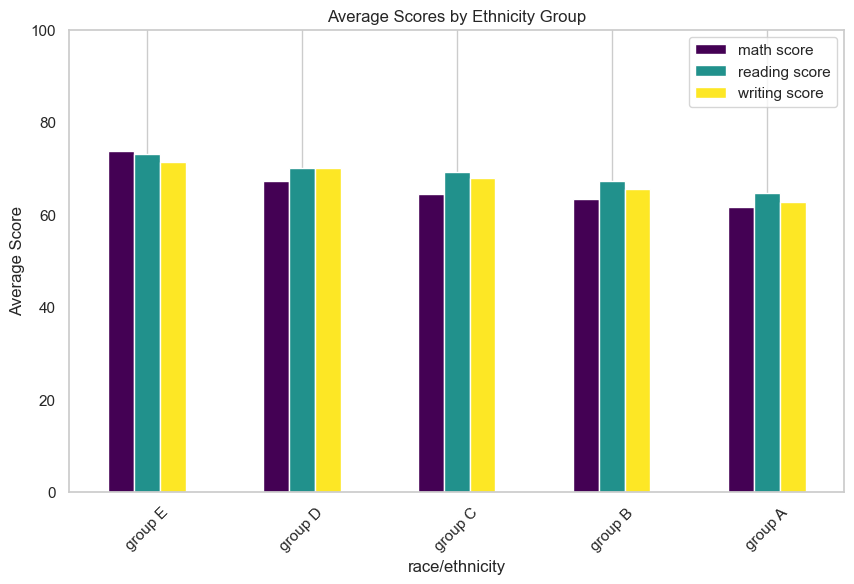

In [189]:
# Group by race/ethnicity and calculate average scores
ethnicity_perf = df.groupby('race/ethnicity')[numerical_vars].mean().sort_values(by='math score', ascending=False)
ethnicity_perf.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title('Average Scores by Ethnicity Group')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()
